# PSTAT 100 Final Project

**Project Title:** Exploring Global Happiness and Wellbeing: An Analysis of Factors Influencing Life Satisfaction Across Countries from 2008 to 2023

**Project Theme:** The project aims to investigate the determinants of happiness and life satisfaction among nations, focusing on key factors such as economic development, social support, health, freedom, generosity, corruption perception, and emotional wellbeing. By analyzing data from the World Happiness Report spanning the years 2008 to 2023, the study seeks to gain deeper insights into the complex relationships that contribute to global happiness trends and disparities.

In [1]:
# Environment Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

**Project Steps:**

**1. Data Collection and Preprocessing:**
   - Obtain the World Happiness Report dataset for the years 2008 to 2023, including variables such as Life Ladder (happiness score), Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, and Negative affect.
   - Check for missing data and handle any inconsistencies or outliers.
   - Group the data by country and perform necessary transformations to prepare it for analysis.

In [23]:
whr_raw = pd.read_csv('data/whr-2023.csv')

unique_countries = whr_raw['Country name'].nunique()
print(unique_countries)

165


In [3]:
# Check for missing values
missing_values = whr_raw.isnull()
missing_prop = missing_values.mean()

# Display the missing value counts for each column
print("Missing Value Proportion:")
print(missing_prop)

Missing Value Proportion:
Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  0.009095
Social support                      0.005912
Healthy life expectancy at birth    0.024557
Freedom to make life choices        0.015007
Generosity                          0.033197
Perceptions of corruption           0.052751
Positive affect                     0.010914
Negative affect                     0.007276
dtype: float64


In [24]:
# Group the data by 'Country name'
grouped_by_country = whr_raw.groupby('Country name')

# Find the missing years for each country
missing_years_dict = {}
whr_filled_list = []
for country, group_data in grouped_by_country:
    all_years = set(range(2008, 2023))  # Assuming the years range from 2000 to 2023
    missing_years = all_years - set(group_data['year'])
    missing_years_dict[country] = list(missing_years)

# Display the missing years for each country
for country, missing_years in missing_years_dict.items():
    if missing_years:
        print(f"Missing years for {country}: {missing_years}")
    else:
        print(f"No missing years for {country}")
        
        
    

Missing years for Afghanistan: [2020]
Missing years for Albania: [2008]
Missing years for Algeria: [2022, 2008, 2009, 2013, 2015]
Missing years for Angola: [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2008, 2009, 2010, 2015]
No missing years for Argentina
Missing years for Armenia: [2020]
Missing years for Australia: [2009]
Missing years for Austria: [2009]
Missing years for Azerbaijan: [2020, 2021, 2022]
Missing years for Bahrain: [2008, 2018, 2021, 2022]
No missing years for Bangladesh
Missing years for Belarus: [2020, 2021, 2022]
Missing years for Belgium: [2009]
Missing years for Belize: [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2008, 2009, 2010, 2011, 2012, 2013, 2015]
Missing years for Benin: [2009, 2010]
Missing years for Bhutan: [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2008, 2009, 2010, 2011, 2012]
No missing years for Bolivia
Missing years for Bosnia and Herzegovina: [2008, 2022]
Missing years for Botswana: [2009, 2020, 2021]
No missing years for Brazil
Missing years for Bulg

In [25]:
for country, group_data in grouped_by_country:
    all_years = set(range(2008, 2023))  # Assuming the years range from 2000 to 2023
    missing_years = all_years - set(group_data['year'])
    missing_years_dict[country] = list(missing_years)

'''
# Display the missing years for each country
for country, missing_years in missing_years_dict.items():
    if missing_years:
        print(f"Missing years for {country}: {missing_years}")
    else:
        print(f"No missing years for {country}")
 
'''
       
# Create a dictionary to store the count of missing countries for each year
missing_countries_count = {}

# Iterate through the missing_years_dict to count the missing countries for each year
for country, missing_years in missing_years_dict.items():
    for year in missing_years:
        if year not in missing_countries_count:
            missing_countries_count[year] = 1
        else:
            missing_countries_count[year] += 1


# Find the year with the least missing countries
year_with_least_missing_countries = min(missing_countries_count, key=missing_countries_count.get)
least_missing_countries_count = missing_countries_count[year_with_least_missing_countries]

# Display the year with the least missing countries and the count of missing countries for that year
print("Year with the least missing countries:", year_with_least_missing_countries)
print("Number of missing countries:", least_missing_countries_count)

# Create a dictionary to store missing countries for each year
missing_countries_by_year = {}

# Iterate through the missing_years_dict to collect missing countries for each year
for country, missing_years in missing_years_dict.items():
    for year in missing_years:
        if year not in missing_countries_by_year:
            missing_countries_by_year[year] = [country]
        else:
            missing_countries_by_year[year].append(country)

# Display the count of missing countries for each year
for year, count in missing_countries_count.items():
    print(f"Year {year} has {count} missing countries.")


Year with the least missing countries: 2017
Number of missing countries: 18
Year 2020 has 49 missing countries.
Year 2008 has 55 missing countries.
Year 2022 has 51 missing countries.
Year 2009 has 51 missing countries.
Year 2013 has 29 missing countries.
Year 2015 has 23 missing countries.
Year 2016 has 24 missing countries.
Year 2017 has 18 missing countries.
Year 2018 has 24 missing countries.
Year 2019 has 22 missing countries.
Year 2021 has 43 missing countries.
Year 2010 has 41 missing countries.
Year 2011 has 19 missing countries.
Year 2012 has 24 missing countries.
Year 2014 has 21 missing countries.


In [26]:
whr2017 = whr_raw[whr_raw.year == 2017]

In [4]:
# Group the data by country
whr_grouped = whr_raw.groupby('Country name').mean()
whr_grouped.reset_index(inplace=True)

# Display the updated grouped data with 'Country name' as a regular column
print(whr_grouped.head())

  Country name         year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2014.642857     3.346643            7.585615        0.484500   
1      Albania  2014.933333     5.047933            9.396933        0.715800   
2      Algeria  2015.800000     5.377400            9.339800        0.814889   
3       Angola  2012.500000     4.420250            8.985750        0.738250   
4    Argentina  2014.000000     6.283588           10.030412        0.902412   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         52.533929                      0.498571    0.060000   
1                         68.505333                      0.683133   -0.074733   
2                         66.080000                      0.530875   -0.141000   
3                         52.150000                      0.456250   -0.090500   
4                         66.664706                      0.774529   -0.152471   

   Perceptions of corruption  Po

**2. Descriptive Statistics and Data Visualization:**
   - Calculate summary statistics for each variable to gain a general understanding of the dataset.
   - Create data visualizations such as bar charts, scatter plots, and heatmaps to visualize the distribution and relationships between different variables.
   - Analyze the trends in the overall global happiness index and compare happiness scores across countries and regions.

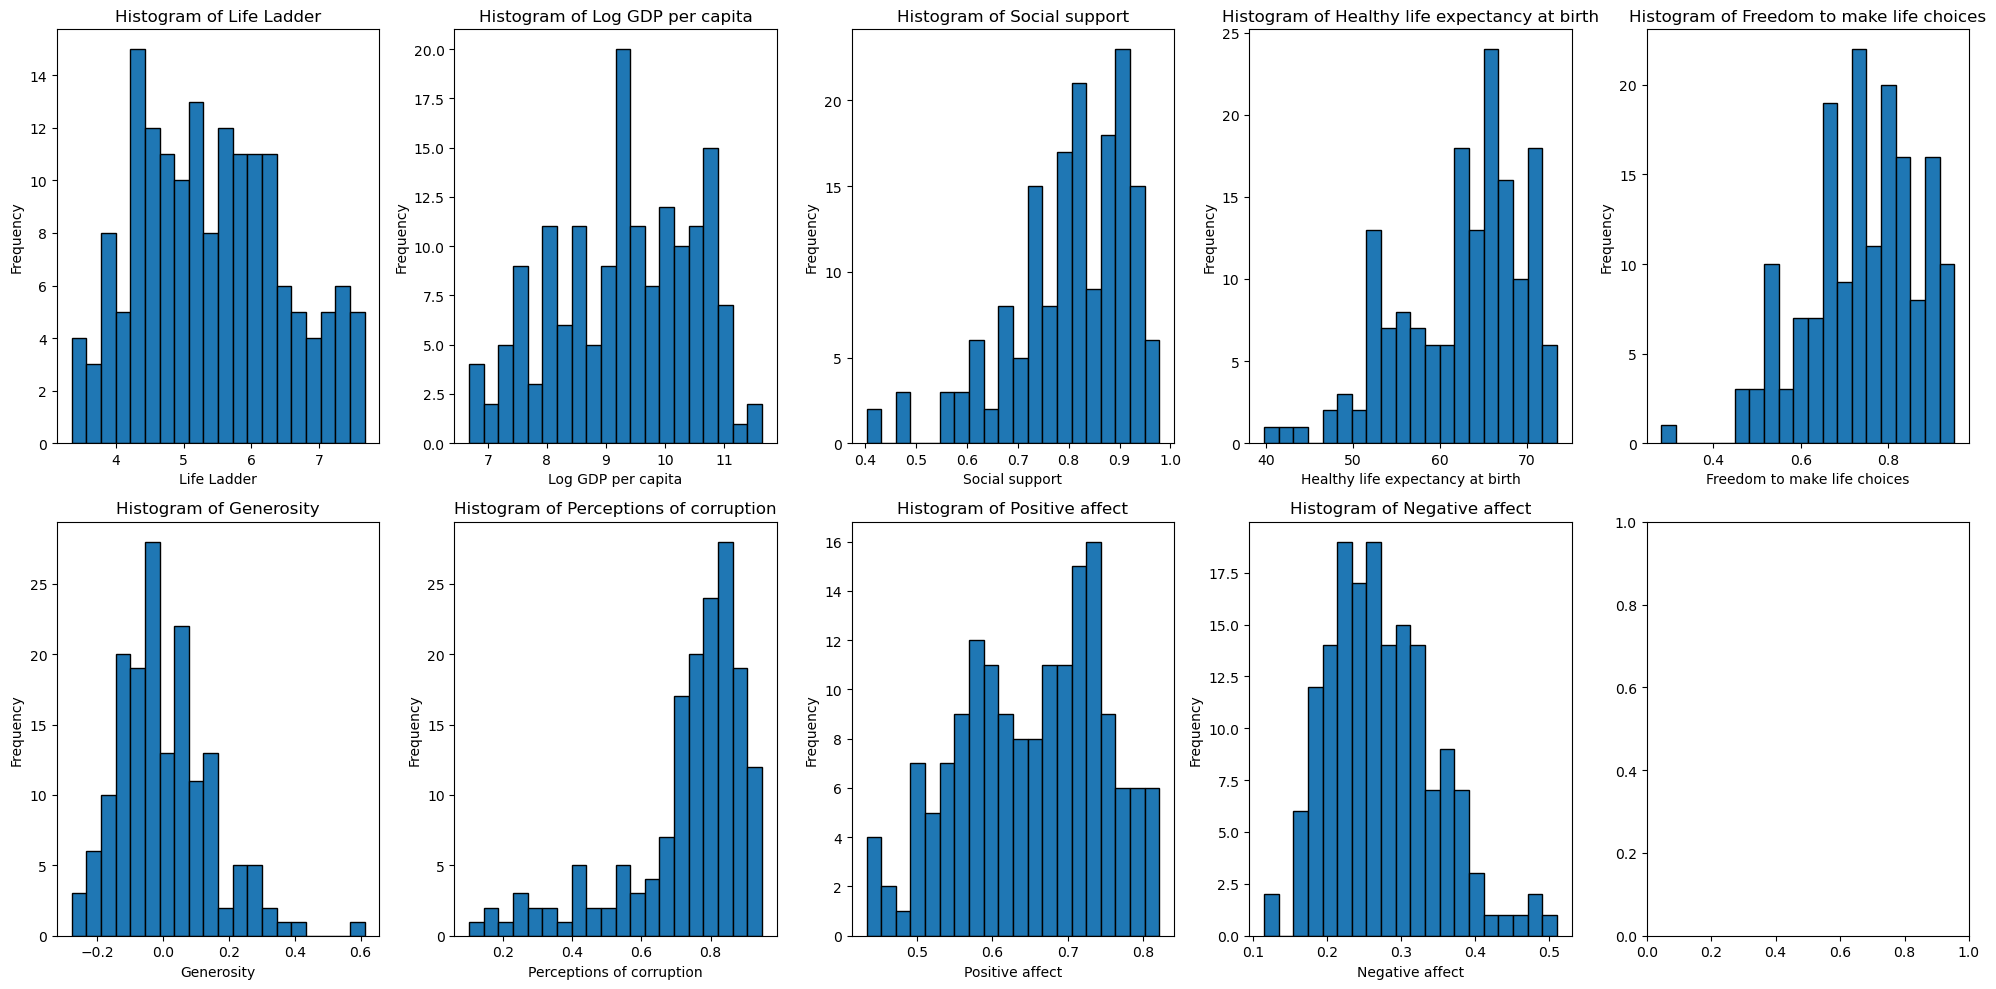

In [5]:
# Get the list of columns (excluding 'Country name' and 'year')
data_columns = whr_grouped.columns[2:]
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Plot a histogram for each variable
for i, column in enumerate(data_columns):
    row, col = divmod(i, 5)  # Calculate row and column indices for the 2x5 grid
    axs[row, col].hist(whr_grouped[column], bins=20, edgecolor='black')
    axs[row, col].set_title(f'Histogram of {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Adjust layout and spacing between subplots
plt.tight_layout()

# Display
plt.show()

**3. Longitudinal Analysis of Global Happiness Trends:**
   - Conduct a time-series analysis to examine how the overall happiness index has changed over the years from 2008 to 2023.
   - Identify countries that have experienced significant changes in happiness levels during this period.

**4. Correlation Analysis:**
   - Perform correlation analysis to explore the relationships between various factors and happiness scores.
   - Identify which factors show strong positive or negative correlations with life satisfaction.

**5. Multiple Regression Analysis:**
   - Build a multiple regression model to assess the combined impact of economic development, social support, health, freedom, generosity, corruption perception, positive affect, and negative affect on the life satisfaction of individuals in different countries.
   - Interpret the regression coefficients and assess the significance of each variable in predicting happiness scores.

**6. Regional Comparison:**
   - Compare happiness scores and key factors across different regions and continents.
   - Analyze regional patterns and identify potential cultural, economic, or social influences on happiness levels.

**7. Impact of Specific Events and Policies:**
   - Investigate how specific social, political, or economic events have affected happiness scores in individual countries.
   - Analyze the impact of government policies and initiatives aimed at promoting wellbeing and happiness.

**8. Conclusion and Recommendations:**
   - Summarize the key findings and insights gained from the analysis.
   - Discuss the implications of the study's results on understanding happiness and wellbeing at a global level.
   - Provide recommendations for policymakers and governments based on the identified factors that have the most significant influence on life satisfaction.

**9. Presentation and Reporting:**
   - Create visual presentations summarizing the research findings, including graphs, charts, and tables.
   - Write a comprehensive report documenting the research process, data analysis methods, results, and conclusions.

**10. Future Directions:**
   - Suggest potential areas for further research and exploration within the realm of happiness and wellbeing studies.
   - Discuss limitations of the current study and propose ways to improve data collection and analysis for future research.

**Note:** Throughout the project, it is essential to use appropriate statistical techniques and data visualization tools to ensure robust and accurate analysis of the dataset. Additionally, the project should adhere to ethical considerations regarding data privacy and confidentiality.